In [35]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [36]:

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


In [37]:

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))

	# compile model
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

  pyplot.show()

  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_plot.png')
  pyplot.close()


In [4]:

# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)


170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/100
781/781 [==============================] - 51s 47ms/step - loss: 1.7647 - accuracy: 0.3946 - val_loss: 1.3368 - val_accuracy: 0.5310
Epoch 2/100
781/781 [==============================] - 36s 47ms/step - loss: 1.2355 - accuracy: 0.5575 - val_loss: 1.3415 - val_accuracy: 0.5484
Epoch 3/100
781/781 [==============================] - 36s 46ms/step - loss: 1.0408 - accuracy: 0.6324 - val_loss: 1.0513 - val_accuracy: 0.6407
Epoch 4/100
781/781 [==============================] - 35s 45ms/step - loss: 0.9375 - accuracy: 0.6720 - val_loss: 0.8675 - val_accuracy: 0.7000
Epoch 5/100
781/781 [==============================] - 35s 44ms/step - loss: 0.8619 - accuracy: 0.6992 - val_loss: 0.7037 - val_accuracy: 0.7561
Epoch 6/100
781/781 [==============================] - 36s 46ms/step - loss: 0.8093 - accuracy: 0.7204 - val_loss: 0.7612 - val_accuracy: 0.7371
Epoch 7/100
781/781 [==============================] - 39s 51ms

In [5]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('test accuracy is : > %.3f' % (acc * 100.0))
# learning curves



test accuracy is : > 89.380


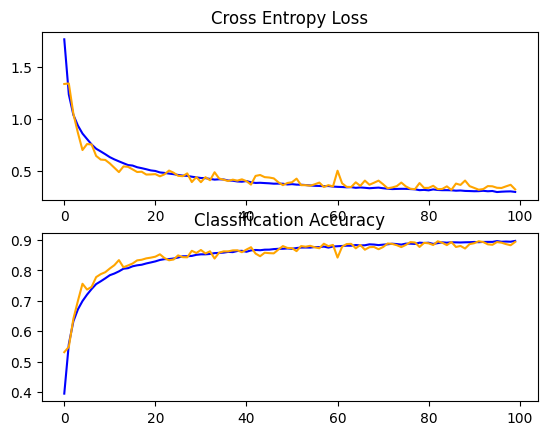

In [18]:
summarize_diagnostics(history)


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
model.save('/content/drive/MyDrive/cifar_model/cifar10_model_LastOk.h5')

In [20]:
def switch(lang):
  match lang:
      case 0:
          return("airplane")
      case 1:
          return("automobile")
      case 2:
          return("bird")
      case 3:
          return("cat")
      case 4:
          return("deer")
      case 5:
          return("dog")
      case 6:
          return("frog")
      case 7:
          return("horse")
      case 8:
          return("ship")
      case 9:
          return("truck")
      case _:
          print("The image isn't Valid")

In [38]:
def LoadSampleData(img_name):
  img = cv2.imread('/content/drive/MyDrive/AI_Deep/' + img_name )
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.axis('off')
  plt.title('main image')

  img_resized = cv2.resize(img, (32, 32))
  plt.subplot(1, 2, 2)
  plt.imshow(img_resized)
  plt.axis('off')
  img_flatten = img_resized.reshape(1, 32, 32,3)
  img_normalized = img_flatten.astype('float32')/255
  plt.title('prepared image')
  plt.show()

  preds = model.predict(img_normalized)
  print('\nprediction of model : \n' , preds)

  predicted_label = np.argmax(preds)
  print('\npredicted label is : ' ,  switch(predicted_label))


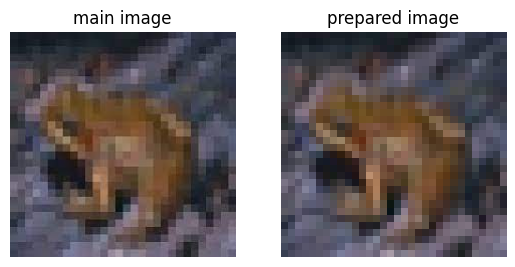

1/1 [==============================] - 0s 22ms/step

prediction of model : 
 [[4.0428873e-07 8.4239633e-07 8.9131181e-06 1.8459008e-05 8.8298839e-06
  5.8750356e-06 9.9995375e-01 1.9621336e-06 5.8479327e-07 4.5420649e-07]]

predicted label is :  frog


In [39]:
LoadSampleData('frog.jfif')

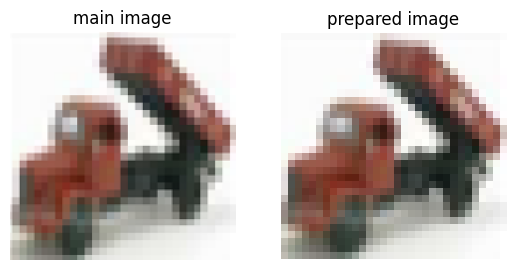

1/1 [==============================] - 0s 21ms/step

prediction of model : 
 [[1.7313532e-05 9.0976595e-05 1.1320450e-06 1.5776084e-06 9.0274760e-08
  8.0774385e-07 4.4265525e-07 5.8322798e-06 1.0100321e-05 9.9987173e-01]]

predicted label is :  truck


In [40]:
LoadSampleData('car.png')

In [41]:
def Load_Test_Image(indx):
  t_image = testX[indx].reshape(1, 32,32,3)
  preds = model.predict(t_image)
  print('\nprediction of model : \n' ,preds)

  predicted_label = np.argmax(preds)
  plt.imshow(testX[indx])
  print('\npredicted lable : ', switch(predicted_label))


1/1 [==============================] - 0s 21ms/step

prediction of model : 
 [[9.13167264e-10 9.73904402e-10 4.17451780e-08 5.17726312e-06
  1.20896875e-08 9.99994397e-01 1.96199075e-08 1.61313466e-07
  3.95003283e-08 3.85433765e-08]]

predicted lable :  dog


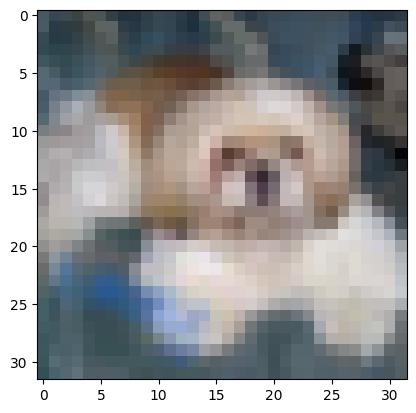

In [42]:
Load_Test_Image(39)

1/1 [==============================] - 0s 21ms/step

prediction of model : 
 [[2.8829161e-02 2.0950871e-05 3.7229207e-04 7.2470895e-05 7.8789999e-05
  9.3109556e-06 2.1405793e-05 8.9809237e-06 9.7054785e-01 3.8706290e-05]]

predicted lable :  ship


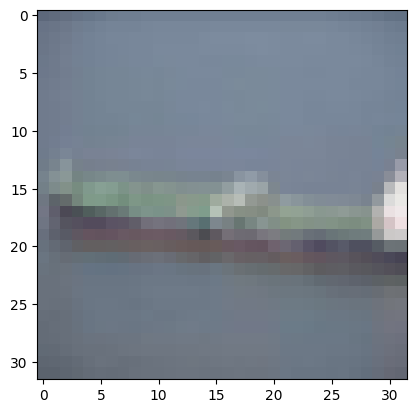

In [32]:
Load_Test_Image(7655)

1/1 [==============================] - 0s 19ms/step

prediction of model : 
 [[3.3209228e-04 3.9168957e-05 3.8278425e-01 5.7553840e-03 9.5350333e-03
  4.6415895e-04 6.0100073e-01 2.0018200e-05 5.9068676e-05 1.0107589e-05]]

predicted lable :  frog


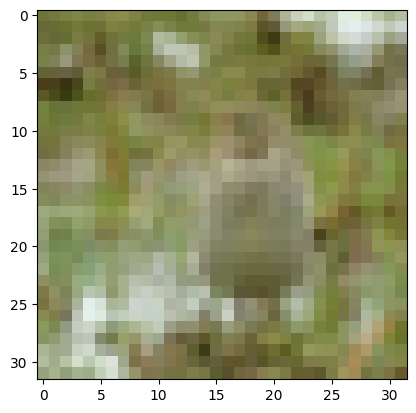

In [34]:
Load_Test_Image(7605)